In [111]:
import csv
import sqlite3
import matplotlib.pyplot as plt

In [112]:
data_by_country = {}  # Fixed typo in variable name

db = sqlite3.connect('megaset.db')
c = db.cursor()

if True == False:
    try:
        with open('megaset.csv', 'r') as csvfile:
            reader = csv.reader(csvfile)
            # Skip header if it exists
            next(reader, None)  
            for row in reader:
                try:
                    c.execute("INSERT INTO main (country, policy, measures, start_year, status, budget) VALUES (?, ?, ?, ?, ?, ?)", 
                            (row[0], row[1], row[2], row[3], row[4], row[5]))
                except sqlite3.Error as e:
                    print(f"Error inserting row: {e}")
        
        # Commit the transaction
        db.commit()
    except Exception as e:
        print(f"Error: {e}")
        db.rollback()  # Rollback in case of error

In [113]:
comparison_region = 'Japan'

In [114]:
region_data = {}
c.execute("SELECT * FROM main WHERE country = ?", (comparison_region,))
rows = c.fetchall()
for row in rows:
    if row[3] not in region_data:
        region_data[row[3]] = int(str(row[5]).replace(' ', ''))
    else:
        region_data[row[3]] += int(str(row[5]).replace(' ', ''))
        
for key, value in region_data.items():
    region_data[key] = value / len(rows)

In [115]:
average_data = {}
c.execute("SELECT * FROM main WHERE country = 'Average'")
rows = c.fetchall()
for row in rows:
    try:
        # Try to convert to float first, then to int if needed
        budget_value = float(str(row[5]).replace(' ', ''))
        if row[3] not in average_data:
            average_data[row[3]] = budget_value
        else:
            average_data[row[3]] += budget_value
    except ValueError:
        print(f"Warning: Could not convert value '{row[5]}' to float for year {row[3]}")
        
for key, value in average_data.items():
    try:
        average_data[key] = value / len(rows)
    except ZeroDivisionError:
        print(f"Warning: Division by zero for year {key} in average data")
        average_data[key] = 0  # Assign a default value or handle as needed

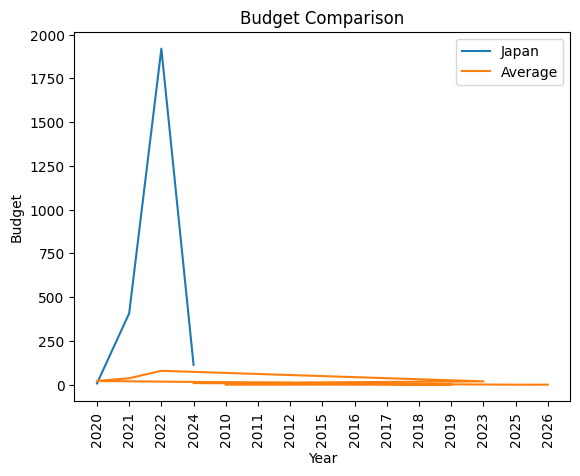

In [116]:
db.commit()
db.close()

sorted_region_years = sorted(region_data.keys(), key=int)
sorted_region_values = [region_data[year] for year in sorted_region_years]

sorted_avg_years = sorted(average_data.keys(), key=int)
sorted_avg_values = [average_data[year] for year in sorted_avg_years]

plt.plot(sorted_region_years, sorted_region_values, label=comparison_region)
plt.plot(sorted_avg_years, sorted_avg_values, label='Average')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Budget')
plt.title('Budget Comparison')
plt.legend()
plt.show()
# Commit changes and close the connection
